In [1]:
import numpy as np
import numpy.linalg as la

### Costruzione matrice con una riga "quasi" combinazione lineare delle altre due

In [2]:
A = np.array([[ 2,  -1,  3],
              [ 3,  -2,  2],
              [17, -10, 19]])
A

array([[  2,  -1,   3],
       [  3,  -2,   2],
       [ 17, -10,  19]])

In [3]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]
print('Autovalori:',ls)
print('Matrice autovettori:\n',V)

Autovalori: [ 20.55447189  -1.5851635    0.03069161]
Matrice autovettori:
 [[-0.15304185  0.30324453 -0.62143392]
 [-0.10746621 -0.73440809 -0.7686358 ]
 [-0.982359   -0.60719644  0.15171974]]


#### RImozione autovalore minimo

In [4]:
ls1=ls[[0,1]]
ls1

array([ 20.55447189,  -1.5851635 ])

#### Rimozione autovettore (colonna) relativo all'autovalore minimo

In [5]:
V1=V[:,[0,1]]
V1

array([[-0.15304185,  0.30324453],
       [-0.10746621, -0.73440809],
       [-0.982359  , -0.60719644]])

#### Calcolo inversa della matrice degli autovettori

In [6]:
V_1=la.inv(V)
V_1

array([[-0.79177261,  0.45375652, -0.9442466 ],
       [ 1.05642477, -0.86785452, -0.0696407 ],
       [-0.89868062, -0.53523933,  0.19855866]])

#### RImozione autovettore (riga) della matrice inversa relativo all'autovalore minimo

In [7]:
V_11 = V_1[[0,1]]
V_11

array([[-0.79177261,  0.45375652, -0.9442466 ],
       [ 1.05642477, -0.86785452, -0.0696407 ]])

#### Matrice degli autovalori

In [8]:
L = np.diag(ls)
L

array([[ 20.55447189,   0.        ,   0.        ],
       [  0.        ,  -1.5851635 ,   0.        ],
       [  0.        ,   0.        ,   0.03069161]])

#### Matrice degli autovalori senza l'autovalore minimo

In [9]:
L1 = np.diag(ls1)
L1

array([[ 20.55447189,   0.        ],
       [  0.        ,  -1.5851635 ]])

#### Ricostruzione matrice A parendo dalle matrici di autovettori e autovalori ridotte

In [10]:
V1.dot(L1.dot(V_11))

array([[  1.98285964,  -1.01020852,   3.00378707],
       [  2.97879952,  -2.01262665,   2.00468413],
       [ 17.00418473,  -9.99750765,  18.99907541]])

#### Si noti che la matrice ricostruita è "quasi" uguale alla matrice originale A

In [11]:
A

array([[  2,  -1,   3],
       [  3,  -2,   2],
       [ 17, -10,  19]])

### Calcolo dei numeri di Fibonacci con gli autovettori

In [12]:
def fibo(n):
    sqr5 = np.sqrt(5)
    a = np.power(((1+sqr5)/2),n+1)
    b = np.power(((1-sqr5)/2),n+1)
    return int((a-b)/sqr5)

In [13]:
for k in range(20):
    print(fibo(k))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


### Funziona con un'immagine quadrata?

In [14]:
from scipy.ndimage import imread
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
img = imread('lion-licking-paw.png', mode='L')

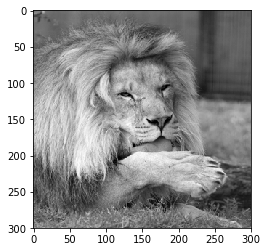

In [17]:
imgplot = plt.imshow(img,cmap='gray')

In [18]:
ls, V = la.eig(img)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [19]:
ls

array([  3.53465290e+04 +0.00000000e+00j,
         3.74227704e+03 +0.00000000e+00j,
        -1.01903784e+03 +1.79122101e+03j,
        -1.01903784e+03 -1.79122101e+03j,
         1.14590105e+03 +4.93218534e+02j,
         1.14590105e+03 -4.93218534e+02j,
         5.60582556e+00 +1.08269660e+03j,
         5.60582556e+00 -1.08269660e+03j,
        -9.46879649e+02 +0.00000000e+00j,
        -5.16380271e+02 +6.53186800e+02j,
        -5.16380271e+02 -6.53186800e+02j,
         7.78031498e+02 +0.00000000e+00j,
         2.91806583e+02 +6.84871725e+02j,
         2.91806583e+02 -6.84871725e+02j,
        -4.27742833e+02 +4.25685598e+02j,
        -4.27742833e+02 -4.25685598e+02j,
         4.82295689e+02 -1.69740659e+02j,
         4.82295689e+02 +1.69740659e+02j,
        -4.57008805e+02 +0.00000000e+00j,
         3.40181965e+02 +2.64648686e+02j,
         3.40181965e+02 -2.64648686e+02j,
         1.42277240e+02 +3.76452202e+02j,
         1.42277240e+02 -3.76452202e+02j,
        -2.24435619e+02 +3.0584698

In [20]:
def reduce_img(V,ls,n):
    ind = np.argsort(np.abs(ls))[::-1]
    ls = ls[ind]
    V = V[:,ind]
    if np.imag(np.sum(ls[:n])) > 1.e-5:
        n += 1
    L = np.diag(ls)
    V_1 = la.inv(V)
    Lr = L[:n,:n]
    Vr = V[:,:n]
    V_1r = V_1[:n,:]
    imgr = np.real(Vr.dot(Lr.dot(V_1r)))
    return imgr

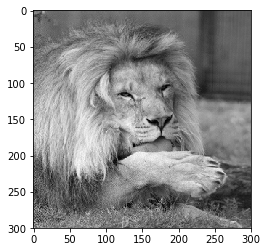

In [21]:
n = 250
imgr = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')

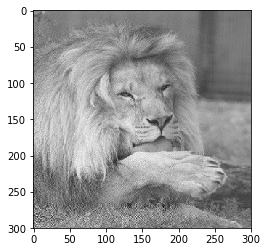

In [22]:
n = 200
imgr = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')

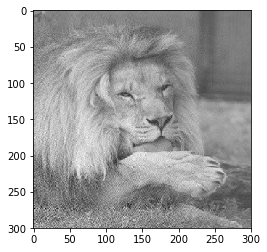

In [23]:
n = 150
imgr = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')

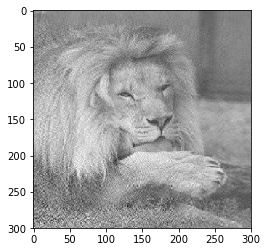

In [24]:
n = 100
imgr = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')

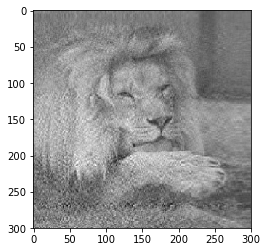

In [25]:
n = 50
imgr = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')

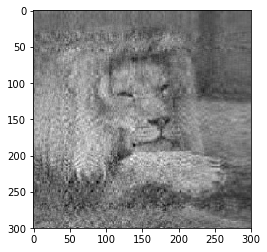

In [26]:
n = 30
imgr = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')

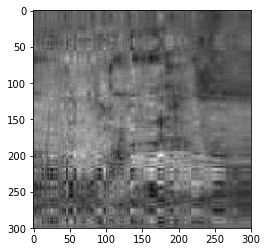

In [27]:
n = 10
imgr = reduce_img(V,ls,n)
plt.imshow(imgr,cmap='gray')

## Autovalori multipli

#### Molteplicità algebrica (ma non geometrica)

In [28]:
A = np.array([[0,1,1],
              [1,0,1],
              [1,1,0]])

In [29]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [30]:
ls

array([ 2., -1., -1.])

In [31]:
V

array([[ 0.57735027, -0.81649658,  0.22645541],
       [ 0.57735027,  0.40824829, -0.79259392],
       [ 0.57735027,  0.40824829,  0.56613852]])

In [32]:
la.inv(V)

array([[ 0.57735027,  0.57735027,  0.57735027],
       [-0.81649658,  0.20412415,  0.61237244],
       [ 0.        , -0.73598007,  0.73598007]])

#### Molteplicità algebrica e geometrica

In [33]:
A = np.array([[1,1],
              [0,1]])

In [34]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [35]:
ls

array([ 1.,  1.])

In [36]:
V

array([[ -1.00000000e+00,   1.00000000e+00],
       [  2.22044605e-16,   0.00000000e+00]])

In [37]:
la.inv(V)

array([[  0.00000000e+00,   4.50359963e+15],
       [  1.00000000e+00,   4.50359963e+15]])

## Matrici simmetriche

#### Matrice A simmetrica

In [38]:
A = np.array([[ 1, 3,-2],
              [ 3,-2,-1],
              [-2,-1, 2]])
A

array([[ 1,  3, -2],
       [ 3, -2, -1],
       [-2, -1,  2]])

#### Calcolo autovalori e autovettori

In [39]:
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

In [40]:
ls

array([ 4.69657438, -3.86197261,  0.16539823])

In [41]:
V

array([[-0.66321777, -0.53632972, -0.52200826],
       [-0.3922944 ,  0.84309956, -0.3678155 ],
       [ 0.63737531, -0.03916086, -0.76955775]])

#### Matrice inversa degli autovettori

In [42]:
V_1 = la.inv(V)
V_1

array([[-0.66321777, -0.3922944 ,  0.63737531],
       [-0.53632972,  0.84309956, -0.03916086],
       [-0.52200826, -0.3678155 , -0.76955775]])

#### Matrice trasposta degli autovettori: è identica alla precedente!

In [43]:
VT = np.transpose(V)
VT

array([[-0.66321777, -0.3922944 ,  0.63737531],
       [-0.53632972,  0.84309956, -0.03916086],
       [-0.52200826, -0.3678155 , -0.76955775]])

#### Gli autovettori sono tutti ortonormali fra loro

In [44]:
VT.dot(V)

array([[  1.00000000e+00,   1.63064007e-16,   2.22044605e-16],
       [  1.63064007e-16,   1.00000000e+00,   1.66533454e-16],
       [  2.22044605e-16,   1.66533454e-16,   1.00000000e+00]])

#### Se modifico la matrice A in modo che non sia più simmetrica (A[1,0]=5)...

In [45]:
A = np.array([[ 1, 3,-2],
              [ -5,-2,-1],
              [-2,-1, 2]])
ls, V = la.eig(A)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]
ls

array([-0.85900514-3.15145677j, -0.85900514+3.15145677j,  2.71801029+0.j        ])

#### ...gli autovalori non sono più tutti necessariamente reali

#### Se costruisco una matrice simmetrica dal prodotto di A (non simmetrica) e della sua trasposta

In [46]:
B = A.dot(np.transpose(A))

#### Calcolo degli autovalori e degli autovettori di B

In [47]:
ls, V = la.eig(B)
ind = np.argsort(np.abs(ls))[::-1]
ls = ls[ind]
V = V[:,ind]

#### Gli autovalori sono tutti reali positivi

In [48]:
ls

array([ 39.5203749 ,  11.65355967,   1.82606544])